In [6]:
from google.colab import files
files.upload()  # then select your file
df = pd.read_csv('insurance.csv')

Saving insurance.csv to insurance (1).csv


In [7]:
import pandas as pd

# Load data
df = pd.read_csv('insurance.csv')

# Show first and last 5 rows
display(df.head())
display(df.tail())

# Dataset shape
print("Shape (rows, cols):", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types for each feature
print("Data types:\n", df.dtypes)

# Count of missing values
print("Missing values per column:\n", df.isnull().sum())

# Count of unique values
print("Unique values per column:\n", df.nunique())



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Shape (rows, cols): (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Unique values per column:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [8]:
# Detect missing values (already shown above)
print("Total missing values:", df.isnull().sum().sum())

# Detect duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Erroneous data: negative ages, invalid BMI or charges
print("Negative ages:", (df['age'] < 0).sum())
print("Negative BMI:", (df['bmi'] < 0).sum())
print("Negative charges:", (df['charges'] < 0).sum())

# Formatting issues: extra spaces, inconsistent cases in object columns
for col in df.select_dtypes('object').columns:
    print(f"{col} unique values before strip + lower:", df[col].unique())
    df[col] = df[col].str.strip().str.lower()
    print(f"{col} unique values after strip + lower:", df[col].unique())



Total missing values: 0
Duplicate rows: 1
Negative ages: 0
Negative BMI: 0
Negative charges: 0
sex unique values before strip + lower: ['female' 'male']
sex unique values after strip + lower: ['female' 'male']
smoker unique values before strip + lower: ['yes' 'no']
smoker unique values after strip + lower: ['yes' 'no']
region unique values before strip + lower: ['southwest' 'southeast' 'northwest' 'northeast']
region unique values after strip + lower: ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing data (none expected, but example)
df = df.dropna()  # or use df.fillna(df.mean()) for imputation if needed

# Correct invalid data: drop negative values if any
df = df[df['age'] >= 0]
df = df[df['bmi'] >= 0]
df = df[df['charges'] >= 0]

# Recheck
print("Cleaned data shape:", df.shape)



Cleaned data shape: (1337, 7)


In [10]:
# Mean, Median, Mode, Min, Max, Variance, Std, Skewness, Kurtosis
print(df.describe())

print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode().iloc[0])
print("Variance:\n", df.var(numeric_only=True))
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurtosis(numeric_only=True))

# Value counts for categorical
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())



               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010
Median:
 age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64
Mode:
 age              18.0
sex              male
bmi              32.3
children          0.0
smoker             no
region      southeast
charges     1121.8739
Name: 0, dtype: object
Variance:
 age         1.972433e+02
bmi         3.721571e+01
children    1.453402e+00
charges     1.466608e+08
dtype: float64
Skewness:
 age         0.054781
bmi         0.2

In [12]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scaling
scaler = MinMaxScaler()
df['bmi_scaled'] = scaler.fit_transform(df[['bmi']])

# Encoding categorical variables
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col + '_enc'] = le.fit_transform(df[col])



In [13]:
import numpy as np

# IQR method for 'bmi'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))
print("Outliers in BMI:", df[outliers].shape[0])

# Z-score method
from scipy.stats import zscore
df['bmi_zscore'] = zscore(df['bmi'])
print("BMI Z-score >3:", (np.abs(df['bmi_zscore']) > 3).sum())

# Remove outliers example:
df_no_outliers = df[~outliers]


Outliers in BMI: 9
BMI Z-score >3: 4


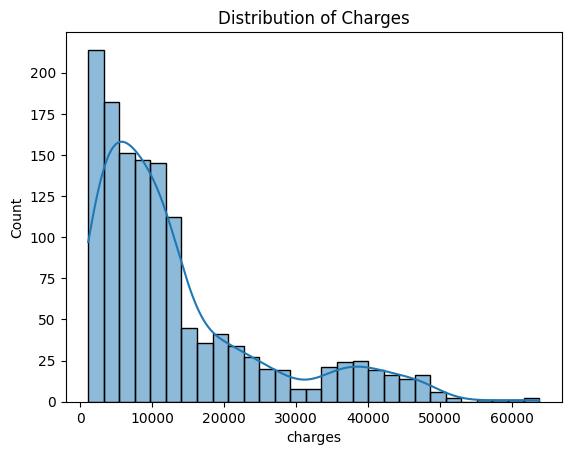

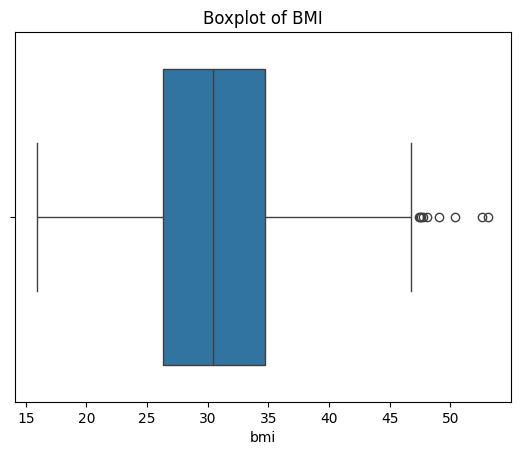

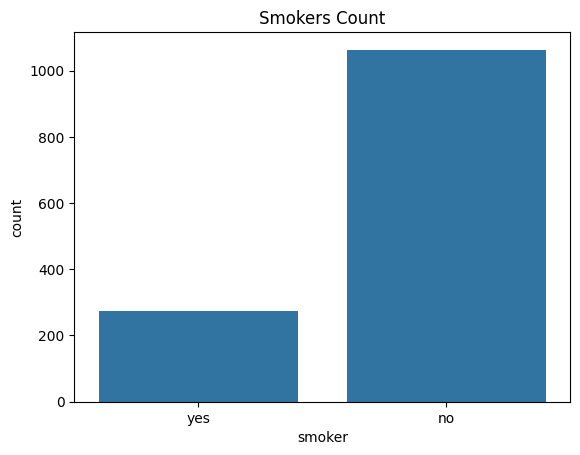

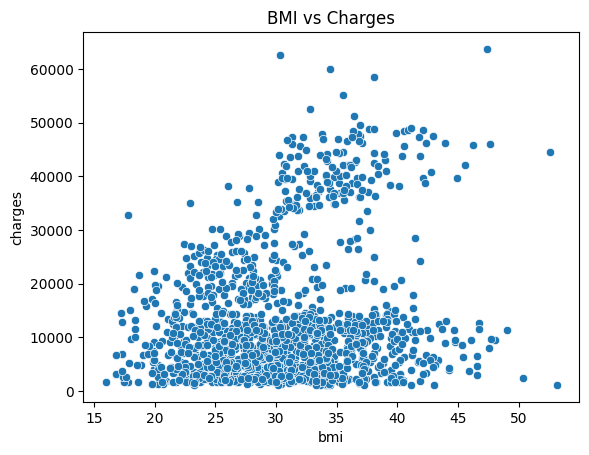

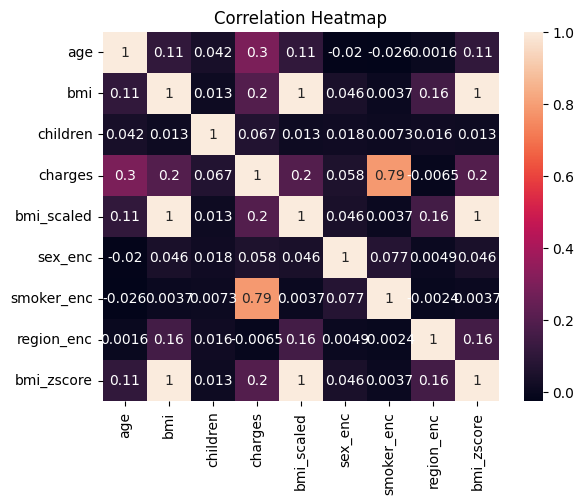

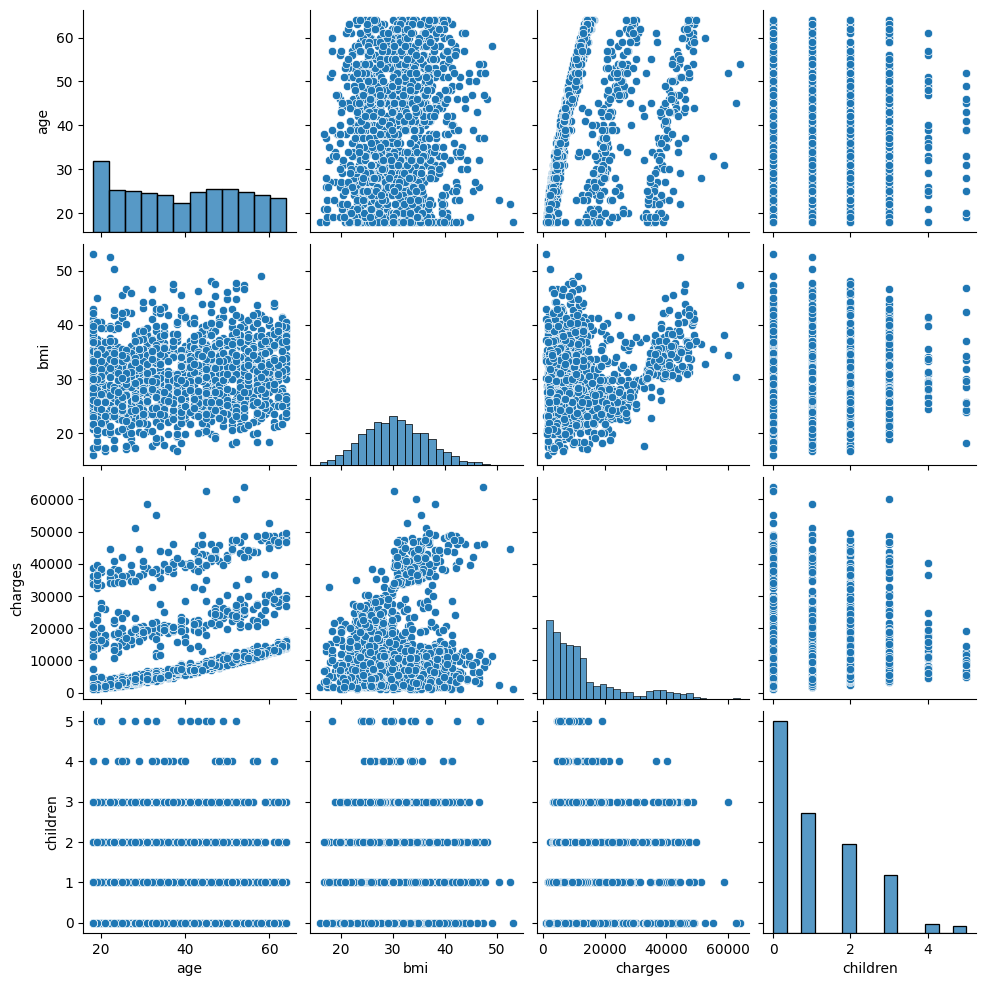

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate: Histogram, Boxplot
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

sns.countplot(x='smoker', data=df)
plt.title('Smokers Count')
plt.show()

# Bivariate: Scatter, Correlation Matrix
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df[['age','bmi','charges','children']])
plt.show()


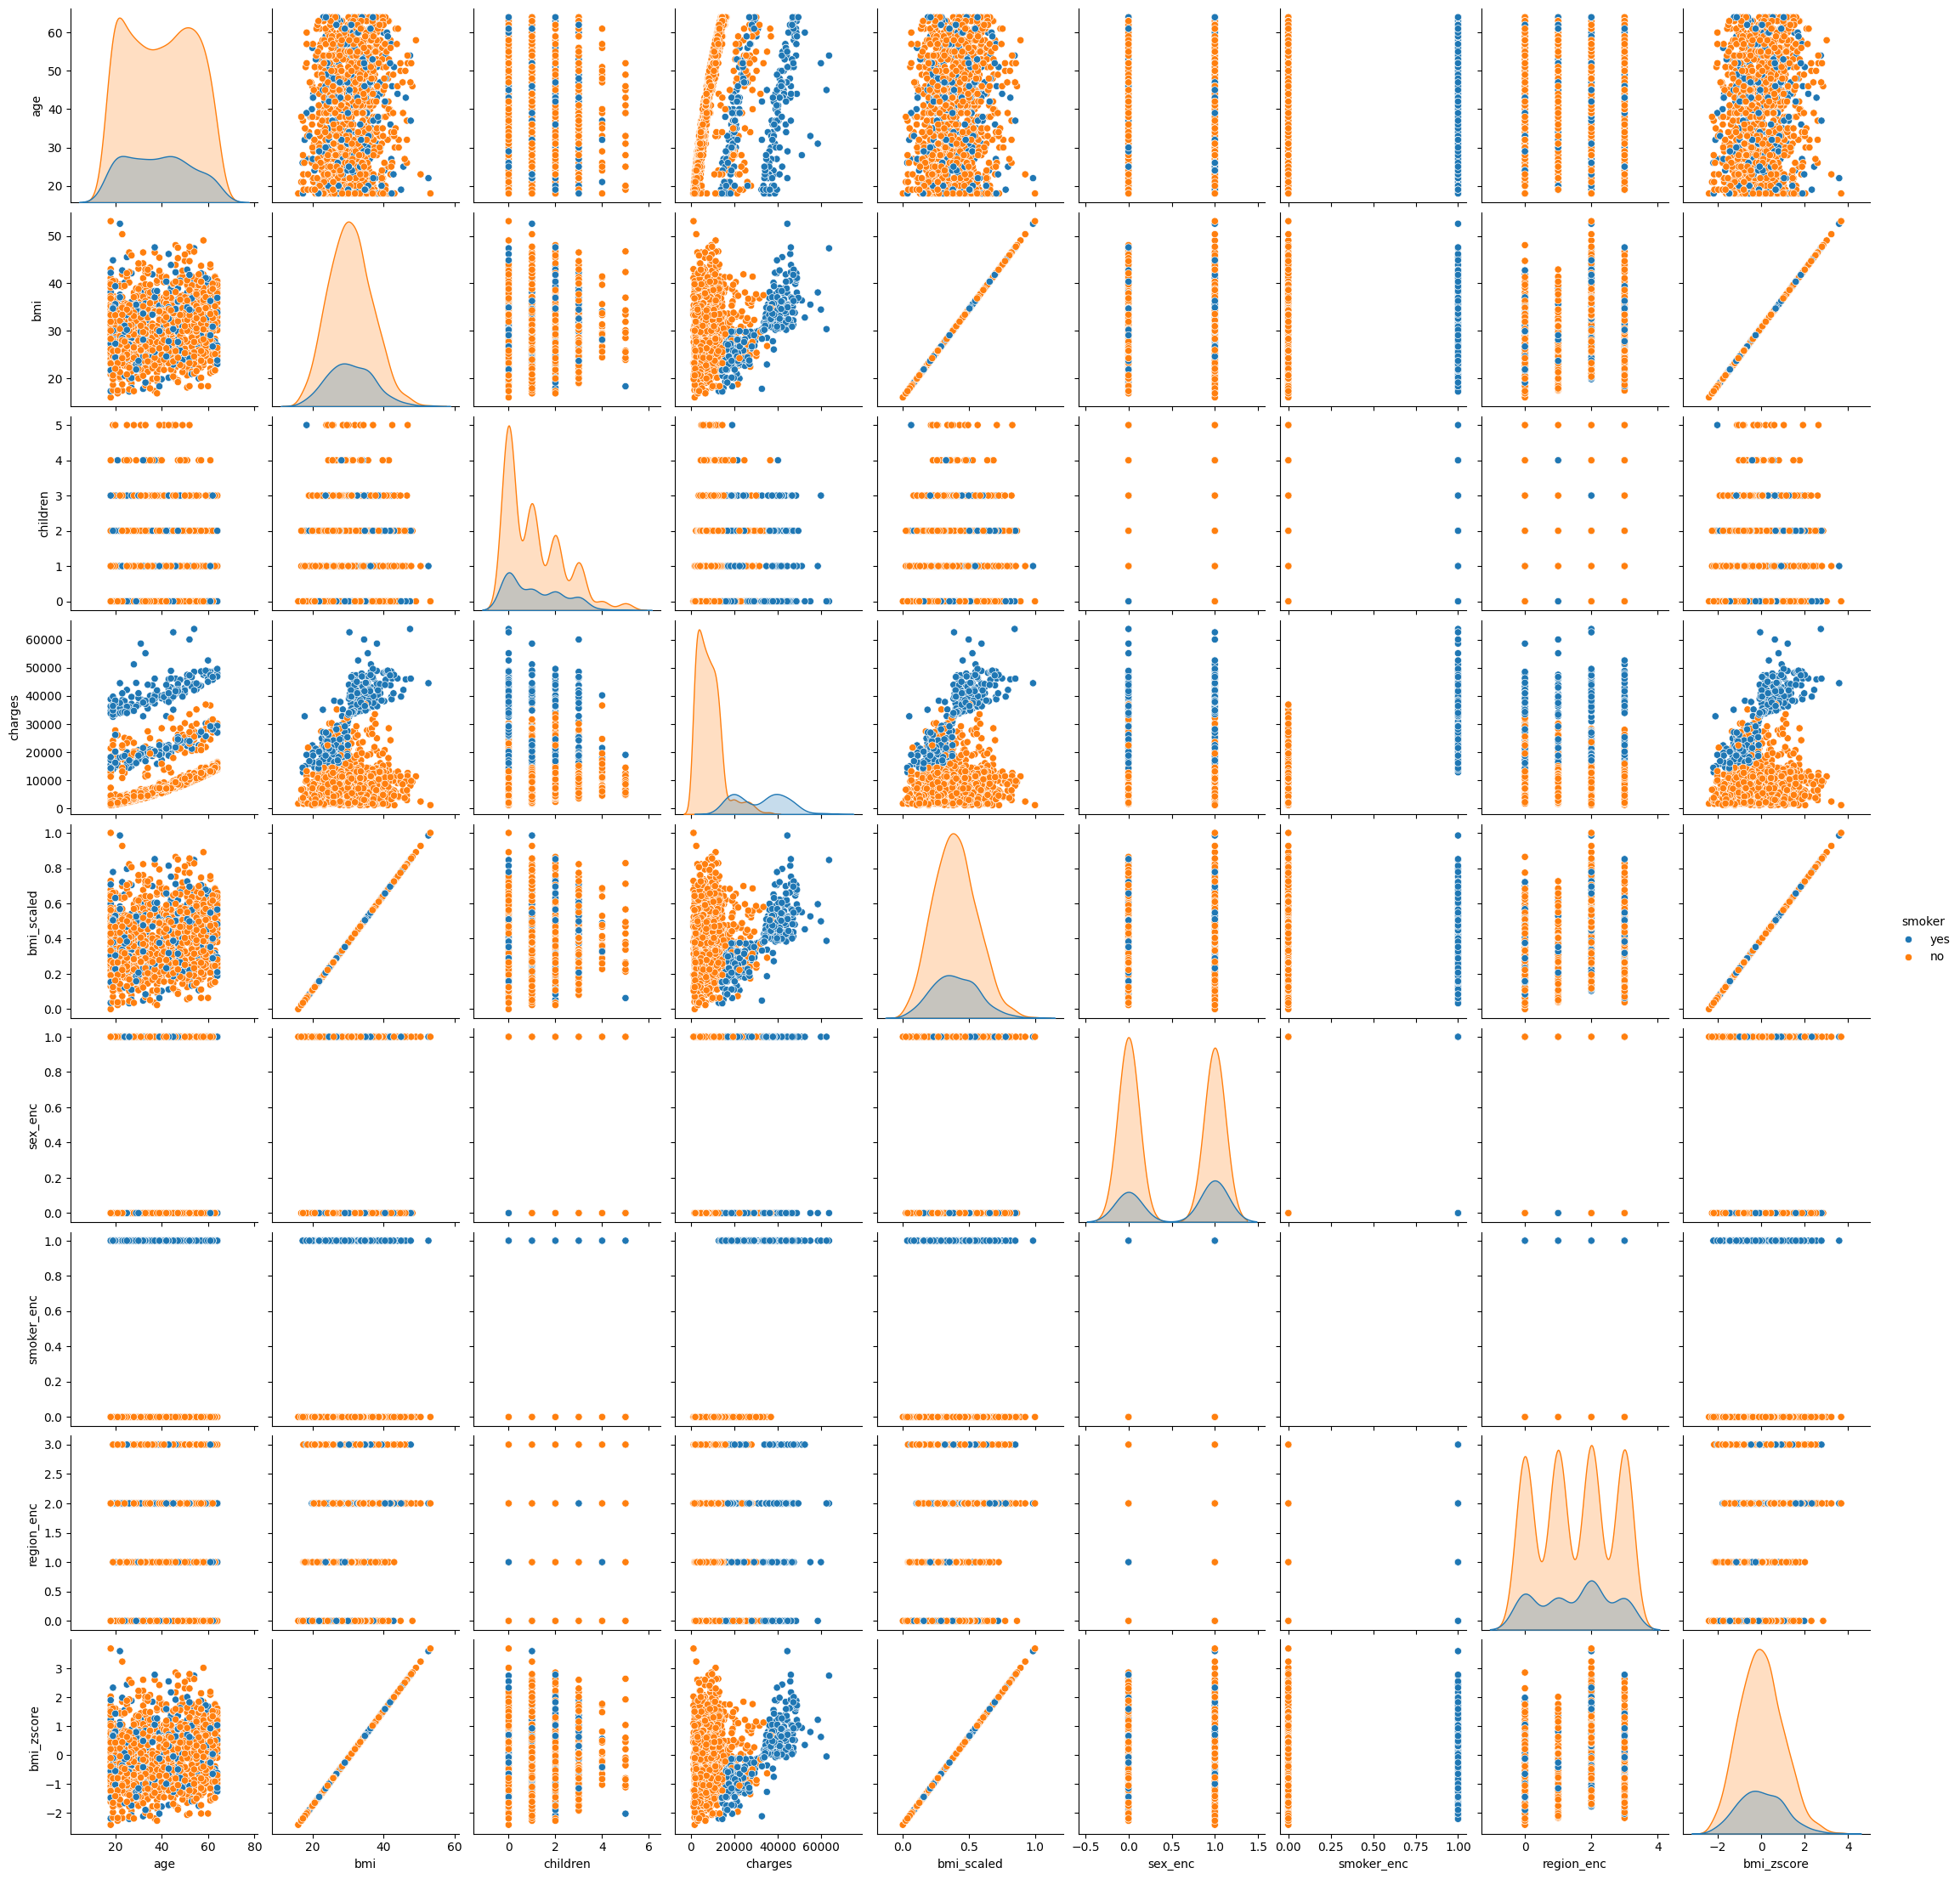

In [15]:
# Pairplot with hue (example: smoker)
sns.pairplot(df, hue='smoker')
plt.show()
